# Intro

This notebook shows a study of the baseline rms under different Night Sky Background Rates as a function of the number of time samples used to compute the baseline.

The requirement on the baseline requires a resolution better than 0.3 p.e. 


In [161]:
from digicamtoy.core.Ntracegenerator import NTraceGenerator
from tqdm import tqdm_notebook as tqdm
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
plt.rcParams.update({'font.size': 30}) 

# Creating data
The data is generated with a toy Monte-Carlo

In [134]:
def generate_waveforms(f_nsb, n_bins, n_waveform, debug=False):
    
    event_stream = NTraceGenerator(nsb_rate=f_nsb, time_end=n_bins*4, n_pixels=2)

    waveforms = np.zeros((n_waveform, n_bins))
    
    for i, event in tqdm(zip(range(n_waveform), event_stream), total=n_waveform, leave=False):
        
        waveforms[i] = event.adc_count[0]
        
        if debug:
            
            if i == 0:
                plt.figure()
            
            plt.step(np.arange(0, n_bins) * 4, event.adc_count[0])
    
    return waveforms

## Computing the baseline rms

In [135]:
def compute_baseline(waveforms):
    
    baselines = np.mean(waveforms, axis=-1)
    
    baseline_mean = np.mean(baselines)
    baseline_std = np.std(baselines)
    
    return baseline_mean, baseline_std

### One small example to check
This cell generates 3 waveforms with 0.5 GHz NSB of 50 samples

HBox(children=(IntProgress(value=0, max=3), HTML(value='')))

233.03333333333333  [LSB] 0.37464056848605914  [LSB]


/home/cyril/anaconda3/envs/digicampipe/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/cyril/anaconda3/envs/digicampipe/lib/python3.6/site-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


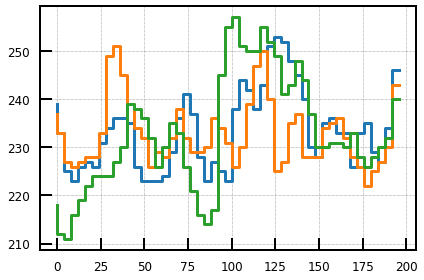

In [136]:
waveforms = generate_waveforms(0.5, 50, 3, debug=True)
baseline_mean, baseline_std = compute_baseline(waveforms)
print(baseline_mean, ' [LSB]' , baseline_std, ' [LSB]')

# Runing over bin and NSB range

In [149]:
n_trials = 100
n_bins = 2 ** (np.arange(1, 10 + 1, 1))
nsb_rates = np.logspace(-3, 0, 4)
print(n_bins, nsb_rates)

[   2    4    8   16   32   64  128  256  512 1024] [0.001 0.01  0.1   1.   ]


In [150]:
mean = np.zeros(n_bins.shape + nsb_rates.shape)
std = np.zeros(mean.shape)

In [151]:
for i, n_bin in tqdm(enumerate(n_bins), total=n_bins.shape[-1]):
    for j, nsb_rate in tqdm(enumerate(nsb_rates), leave=False, total=nsb_rates.shape[-1]):
        
        waveforms = generate_waveforms(nsb_rate, n_bin, n_trials)
        baseline_mean, baseline_std = compute_baseline(waveforms)
        mean[i, j] = baseline_mean
        std[i, j] = baseline_std

HBox(children=(IntProgress(value=0, max=10), HTML(value='')))

HBox(children=(IntProgress(value=0, max=4), HTML(value='')))

HBox(children=(IntProgress(value=0), HTML(value='')))

HBox(children=(IntProgress(value=0), HTML(value='')))

HBox(children=(IntProgress(value=0), HTML(value='')))

HBox(children=(IntProgress(value=0), HTML(value='')))

HBox(children=(IntProgress(value=0, max=4), HTML(value='')))

HBox(children=(IntProgress(value=0), HTML(value='')))

HBox(children=(IntProgress(value=0), HTML(value='')))

HBox(children=(IntProgress(value=0), HTML(value='')))

HBox(children=(IntProgress(value=0), HTML(value='')))

HBox(children=(IntProgress(value=0, max=4), HTML(value='')))

HBox(children=(IntProgress(value=0), HTML(value='')))

HBox(children=(IntProgress(value=0), HTML(value='')))

HBox(children=(IntProgress(value=0), HTML(value='')))

HBox(children=(IntProgress(value=0), HTML(value='')))

HBox(children=(IntProgress(value=0, max=4), HTML(value='')))

HBox(children=(IntProgress(value=0), HTML(value='')))

HBox(children=(IntProgress(value=0), HTML(value='')))

HBox(children=(IntProgress(value=0), HTML(value='')))

HBox(children=(IntProgress(value=0), HTML(value='')))

HBox(children=(IntProgress(value=0, max=4), HTML(value='')))

HBox(children=(IntProgress(value=0), HTML(value='')))

HBox(children=(IntProgress(value=0), HTML(value='')))

HBox(children=(IntProgress(value=0), HTML(value='')))

HBox(children=(IntProgress(value=0), HTML(value='')))

HBox(children=(IntProgress(value=0, max=4), HTML(value='')))

HBox(children=(IntProgress(value=0), HTML(value='')))

HBox(children=(IntProgress(value=0), HTML(value='')))

HBox(children=(IntProgress(value=0), HTML(value='')))

HBox(children=(IntProgress(value=0), HTML(value='')))

HBox(children=(IntProgress(value=0, max=4), HTML(value='')))

HBox(children=(IntProgress(value=0), HTML(value='')))

HBox(children=(IntProgress(value=0), HTML(value='')))

HBox(children=(IntProgress(value=0), HTML(value='')))

HBox(children=(IntProgress(value=0), HTML(value='')))

HBox(children=(IntProgress(value=0, max=4), HTML(value='')))

HBox(children=(IntProgress(value=0), HTML(value='')))

HBox(children=(IntProgress(value=0), HTML(value='')))

HBox(children=(IntProgress(value=0), HTML(value='')))

HBox(children=(IntProgress(value=0), HTML(value='')))

HBox(children=(IntProgress(value=0, max=4), HTML(value='')))

HBox(children=(IntProgress(value=0), HTML(value='')))

HBox(children=(IntProgress(value=0), HTML(value='')))

HBox(children=(IntProgress(value=0), HTML(value='')))

HBox(children=(IntProgress(value=0), HTML(value='')))

HBox(children=(IntProgress(value=0, max=4), HTML(value='')))

HBox(children=(IntProgress(value=0), HTML(value='')))

HBox(children=(IntProgress(value=0), HTML(value='')))

HBox(children=(IntProgress(value=0), HTML(value='')))

HBox(children=(IntProgress(value=0), HTML(value='')))

# Plotting
## convert LSB to p.e.

In [184]:
def gain_drop(
    nsb_rate,
    cell_capacitance=85. * 1E-15,
    bias_resistance=10. * 1E3
):
    return 1. / (1. + nsb_rate * cell_capacitance * bias_resistance * 1E9)

gain = gain * gain_drop(nsb_rates)

In [185]:
cta_requirement = 0.3 # p.e.

In [183]:
from matplotlib.pyplot import cm
color=cm.rainbow(np.linspace(0,1, nsb_rates.shape[-1]))

/home/cyril/anaconda3/envs/digicampipe/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/cyril/anaconda3/envs/digicampipe/lib/python3.6/site-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


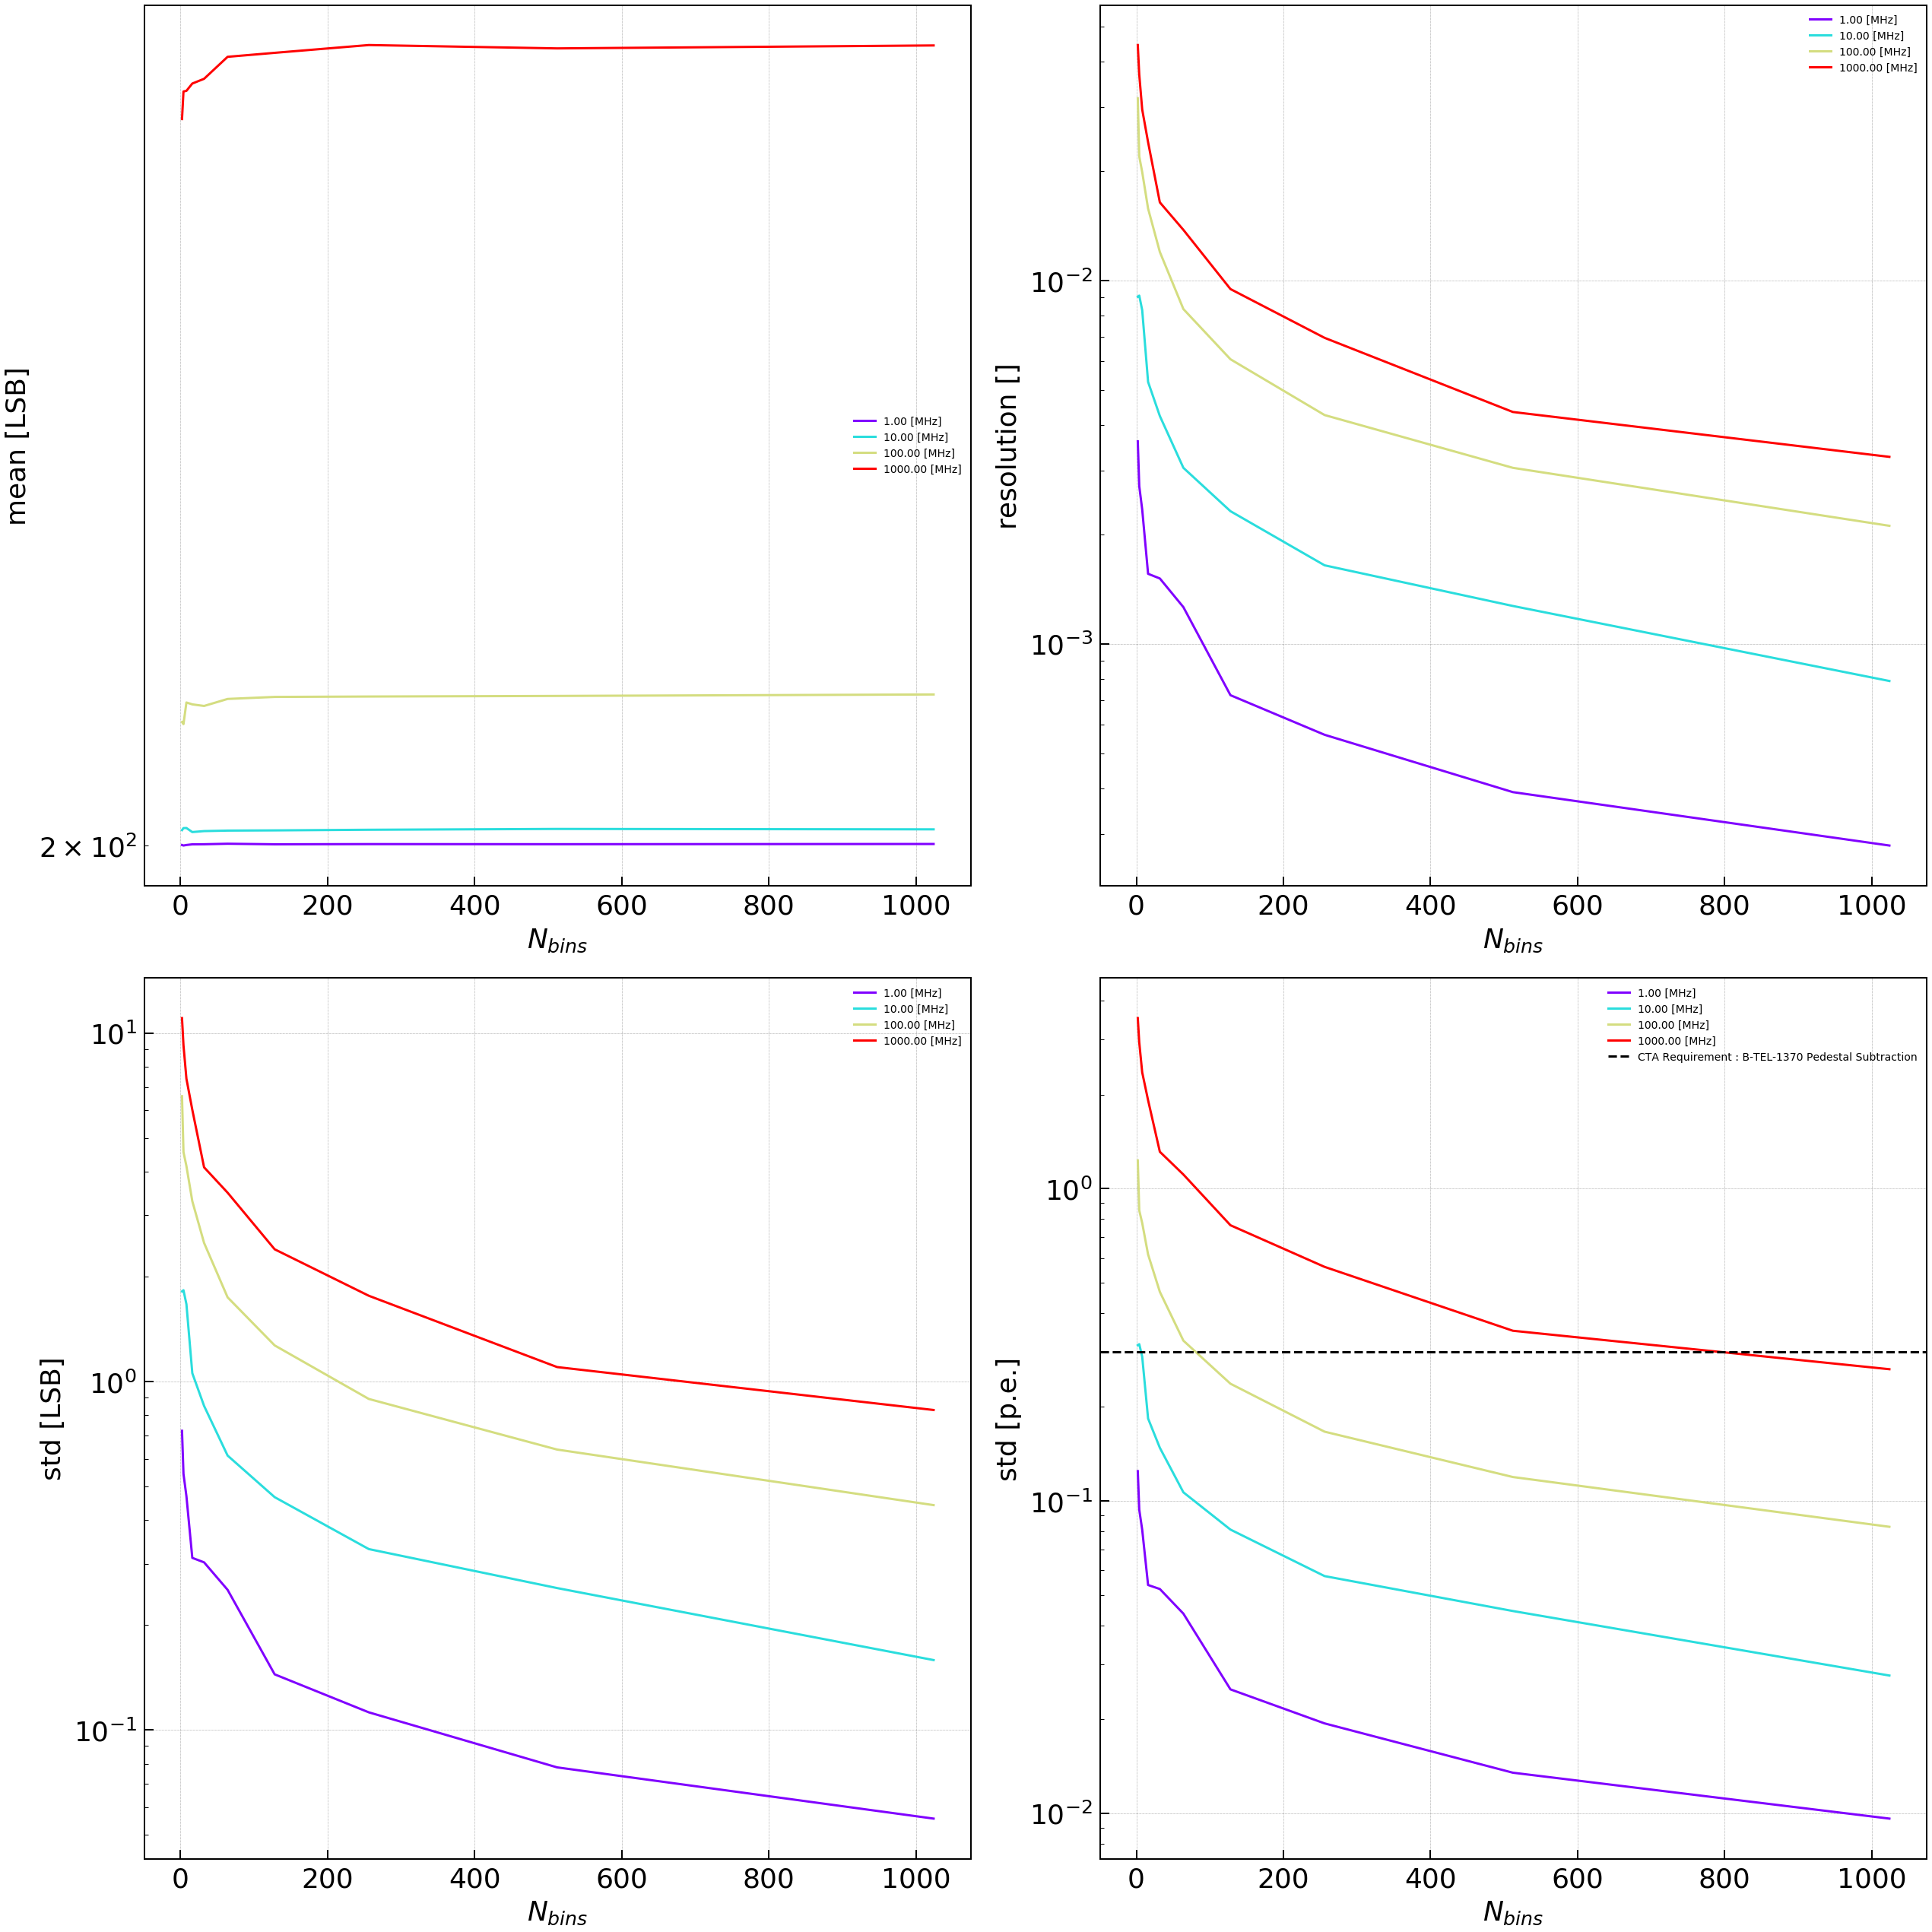

In [190]:

fig, ax = plt.subplots(2, 2, figsize=(36, 36))

for j, nsb_rate in enumerate(nsb_rates):
    
    
    label = '{:.2f} [MHz]'.format(nsb_rate * 1E3)
    kwargs = {'label': label, 'color': color[j]}

    
    ax[0, 0].semilogy(n_bins, mean[:, j], **kwargs)
    ax[1, 0].semilogy(n_bins, std[:, j], **kwargs)
    ax[0, 1].semilogy(n_bins, std[:, j] / mean[:, j], **kwargs)
    ax[1, 1].semilogy(n_bins, std[:, j] / gain[j], **kwargs)

ax[1, 1].axhline(cta_requirement, label='CTA Requirement : B-TEL-1370 Pedestal Subtraction', linestyle='--', color='k')
    
xlabel = '$N_{bins}$'
ax[0, 0].set_xlabel(xlabel)
ax[1, 0].set_xlabel(xlabel)
ax[0, 1].set_xlabel(xlabel)
ax[1, 1].set_xlabel(xlabel)


ax[0, 0].set_ylabel('mean [LSB]')
ax[1, 0].set_ylabel('std [LSB]')
ax[0, 1].set_ylabel('resolution []')
ax[1, 1].set_ylabel('std [p.e.]')


ax[0, 0].legend(loc='best')
ax[1, 0].legend(loc='best')
ax[0, 1].legend(loc='best')
ax[1, 1].legend(loc='best')




One can see that using more than 1000 samples the std of the baseline stays bellow the requirements event at high NSB rate (1 GHz). The typical on site high NSB for SST-1M is 660 MHz.
If one has now $f=10~{\rm Hz}$ "interleaved events" to reconstruct baseline with each event having 50 samples. Over the course of $\Delta t=2~{\rm s}$ that would give: 

$$N_{bins} = 50 \cdot f \Delta t =  1000~{\rm samples}$$ 

The baseline computed by the DigiCam is obtained over 1024 pre-samples. This has the advantage of beeing the direct pre-samples from the event. However the value at the moment is the floored value of the averaged 1024 pre-samples. But it will soon be given to higher precision (2 digits).

One could also use the baseline from DigiCam of the "interleaved events" and the waveform, in that case the number of bins per event is $1024 + 50  = 1074$ which is a factor $1074/50 \sim 21$ higher.

# Conclusion
In terms of satisfying the requirement it seems that a baseline computed with more than 1000 bins is enough. However the impact on the reconstruction pipeline is not established. The questions:  
* "What does a 0.3 p.e. precision on the baseline implies for the charge resolution?"
* "What are the effects of time varying NSB rate?"

are not yet answered.